In [1]:
import numpy as np
import numpy as np, h5py
from scipy import signal
import scipy.io
from scipy.fftpack import fft

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import glob

In [2]:
matplotlib.rcParams["figure.figsize"] = [15, 8]

----------

### Matlab to numpy

In [3]:
files = glob.glob("data/*.mat")

In [4]:
files

['data/R-HPC-ch14.mat',
 'data/1_channel_30_minutes.mat',
 'data/1_channel_10_minutes.mat',
 'data/10_channels_10_minutes.mat']

In [5]:
matfile = scipy.io.loadmat(files[0])

In [6]:
print(matfile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'M'])


In [7]:
data = np.array(matfile.get("M"))[0]

In [8]:
data

array([-190, -421, -507, ...,  260,  214,  141], dtype=int16)

In [9]:
data.shape

(51386880,)

#### set parameters

sampling frequency: 32 kHz

duration: ~26 min

channels: 1

passband: 300-3000 Hz

In [10]:
sfreq = 32000
N = data.shape[0]
dur = N / sfreq
freq_domain = np.linspace(0, sfreq, N)
passband = (300, 3000)

Text(0.5, 1.0, 'First second of signal')

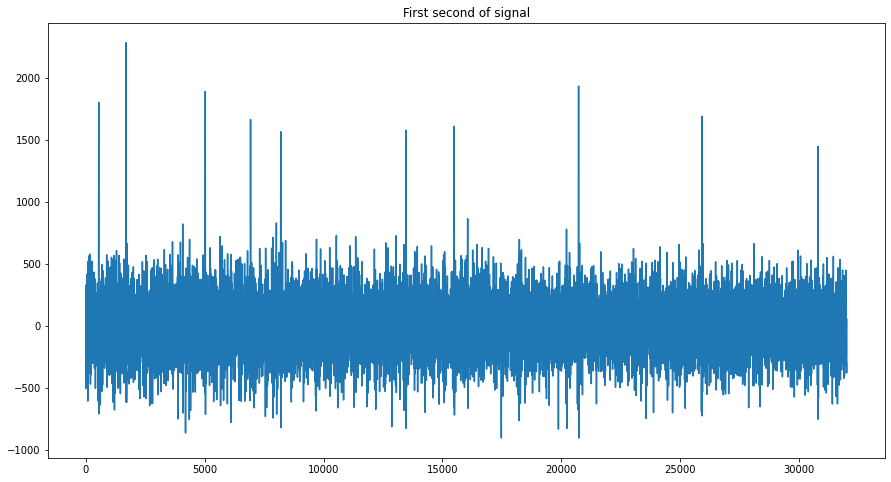

In [19]:
plt.plot(data[:32000])
plt.title("First second of signal")

---------------

### Fourier transform

In [11]:
%%time
ft = fft(data)

CPU times: user 1min 57s, sys: 664 ms, total: 1min 57s
Wall time: 1min 57s


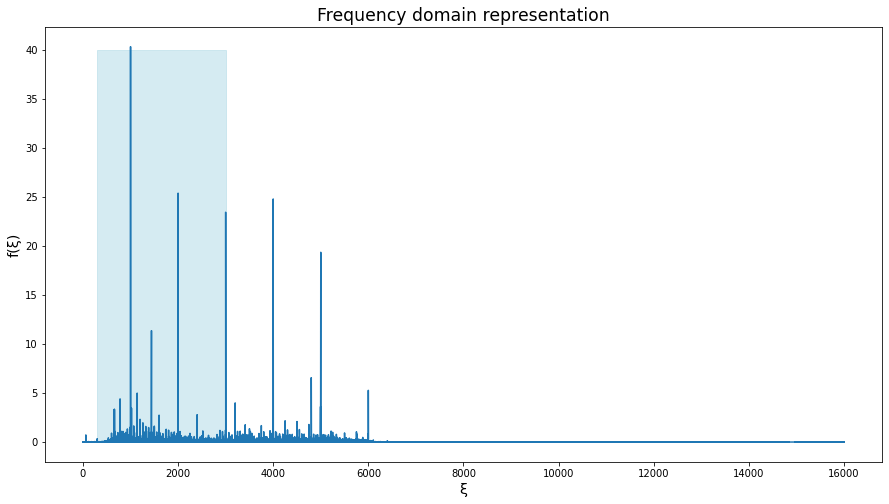

In [27]:
plt.plot(freq_domain[: N // 2], 2.0 / N * np.abs(ft[: N // 2]))
plt.title("Frequency domain representation", fontsize="xx-large")
plt.xlabel("ξ", fontsize="x-large")
plt.ylabel("f(ξ)", fontsize="x-large")
plt.fill_betweenx(
    np.arange(0, (2.0 / N * np.abs(ft[: N // 2])).max()),
    *passband,
    color="lightblue",
    alpha=0.5
)

-------------

### Design bandpass filter

In [12]:
%%timeit
sos = signal.butter(10, passband, btype="bandpass", fs=sfreq, output="sos",)
w, h = signal.sosfreqz(sos)

3.49 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


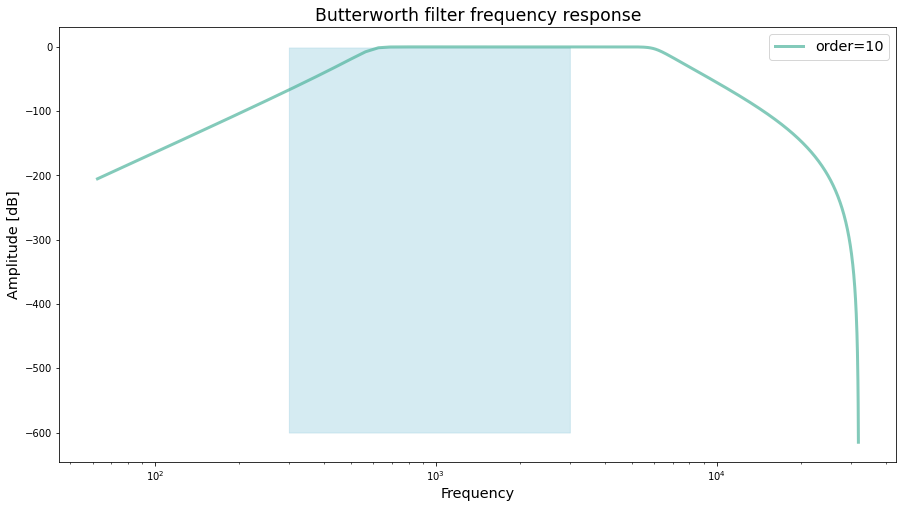

In [14]:
plt.plot(
    w[1:] / np.pi * sfreq,
    20 * np.log10(abs(h[1:])),
    label="order=10",
    linewidth=3,
    alpha=0.7,
    c="#4fb49d",
)

plt.fill_betweenx(np.arange(-600, 0), *passband, color="lightblue", alpha=0.5)
plt.xscale("log")
plt.title("Butterworth filter frequency response", fontsize="xx-large")
plt.xlabel("Frequency", fontsize="x-large")
plt.ylabel("Amplitude [dB]", fontsize="x-large")
plt.legend(fontsize="x-large")

---------

### Apply filter

In [15]:
%%timeit
filtered = signal.sosfiltfilt(sos, data)

3.32 s ± 35.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'First second of filtered signal')

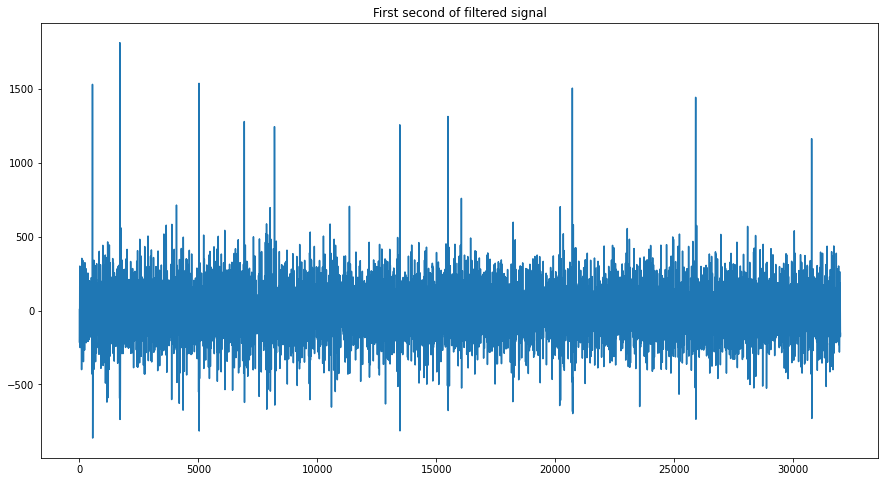

In [22]:
plt.plot(filtered[:32000])
plt.title("First second of filtered signal")

In [17]:
ft_filtered = fft(filtered)

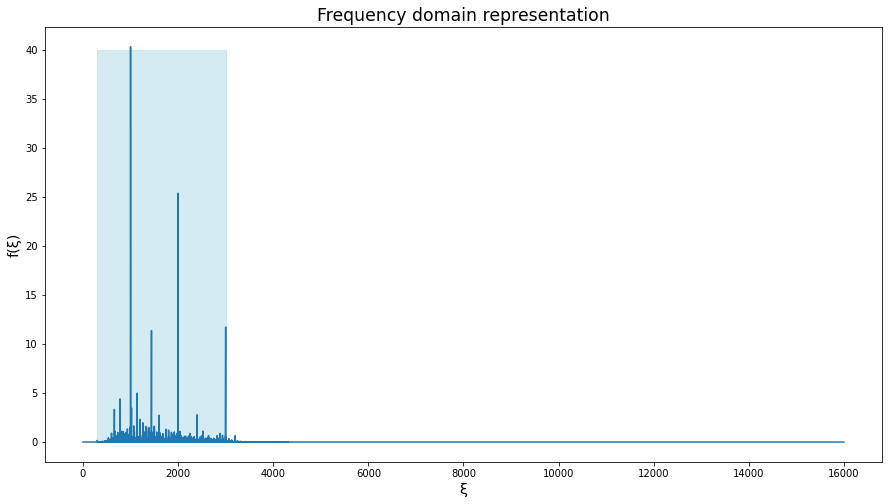

In [19]:
plt.plot(freq_domain[: N // 2], 2.0 / N * np.abs(ft_filtered[: N // 2]))
plt.title("Frequency domain representation", fontsize="xx-large")
plt.xlabel("ξ", fontsize="x-large")
plt.ylabel("f(ξ)", fontsize="x-large")
plt.fill_betweenx(
    np.arange(0, (2.0 / N * np.abs(ft_filtered[: N // 2])).max()),
    *passband,
    color="lightblue",
    alpha=0.5
)

In [20]:
np.save('new_filtered.npy', filtered)